<center><h1>Rapport de Stage</h1><br/><h2>Analyse de donnée sur de l'Open Data</h2><br/><h3>Rédigé et réaliser par Paul Monimeau</h3></center>
<br/><br/><br/>
<h4>Sous la tutelle de Mr F.Flouvat (UNC) et de Mr A.SALES (OPT)<h4>

------------------------------ 

---------------------------------

![](Images/prezzz_paul.png)  

----------


 















# INDEX

1.  [Sujet du stage](#Sujet-du-stage)
2.  [Apprentissage avec OpenClassRooms et autres](#Apprentissage-avec-OpenClassRooms-et-autres)
3.  [Première analyses des données de Scal’Air](#Première-analyses-des-données-de-Scal'Air)
8.  [Un tout nouvel horizon e de nouvelles données](#Un-tout-nouvel-horizon-et-de-nouvelles-données)
  1. [L'utilité possible](#L'utilité-possible)
  1. [Récupération de la donnée](#Récupération-de-la-donnée)
  1. [Analyse de la donnée](#Analyse-de-la-donnée)
  1. [Algorithme de prédiction](#Algorithme-de-prédiction)
  1. [Création de l'API](#Création-de-l'API)
  1. [Création d'une interface Web](#Création-d'une-interface-Web)
  1. [Création d'une application Mobile](#Création-d'une-application-Mobile)
9.  [Conclusion](#Conclusion)
10. [Annexes](#ANNEXES)


-------------

# PRESENTATION

## Sujet du stage

__L'objectif initial du stage est d'analyser des données de Scal'Air NC, obtenues grâce à une API développée qui vient scrapper le site web de Scal'Air. Le but du stage étant de produire un "data story telling" ainsi qu'un modèle de prédiction pouvant possiblement être exporté sur une API. Ce schéma de travail pourrait quant à lui servir de base pour toutes autre approches d'analyses de données sur de l'open Data lors d'innovations à l'OPT.__
  
[-Lien du Sujet du stage](https://sway.office.com/pQ4PEOhog4vQOe2l?ref=email)  

[-Lien de la Présentation reveal.js](https://slides.com/monimpaul/deck-4c5e0d/fullscreen)  

[-Lien du Rapport jupyterNoteBook sur Git](https://github.com/Icet0/Rapport/blob/master/Rapport.ipynb)

[-Lien du Rapport sur GitPages](https://icet0.github.io/rapport-stage/)

## Apprentissage avec OpenClassRooms et autres

[Toute cette partie est en annexe](#Apprentissage-avec-OpenClassRooms)

## Première analyses des données de Scal'Air 

Ces données contiennent l'indice de qualité de l'air pour certains quartiers de Nouméa et à des dates données. Cet indice est calculé au préalable par Scal'Air en fonction de la quantité des différentes molécules qui composent l'air. Cet indice est appelé [indice ATMO](https://www.futura-sciences.com/planete/questions-reponses/pollution-quest-ce-indice-atmo-4099/)
  


__Un exemple du jeu de données :__   
On voit ici un DataFrame crée par python.


![](Images/tab1.png)

Les données de Scal'Air nous ont permises d'apprendre la méthodologie pour arriver à la publication d'une API prédictive. 

![](Images/optPrez.png)

## Un tout nouvel horizon et de nouvelles données

Après cet entraînement sur les données de Scal'Air et un processus bien rodé, nous pouvons maintenant s'attaquer à un exemple possiblement utile à l'OPT, le temps d'attente dans les Agences OPT.
Cette donnée est récupérée grâce à un script python qui via un cron tourne toutes les 5 min et va récupérer les données grâce à une API disponible sur le site de l'OPT.
Après un petit tri et un gros nettoyage, les données sont stockées sur un csv qui ne cesse de grossir.

### L'utilité possible

Ce que l'on peut espérer de ces analyses, c'est qu'on puisse observer une régularité du temps d'attente en fonction des horaires, et du nombre de guichet ouvert, et de l'agence. Ces informations pourraient être utiles pour une réorganisation des Agences, ou bien même pour le client qui voudrait prédire, ou avoir une idée du temps à attendre pour aller déposer ou récupérer son colis/courrier/etc...

### Récupération de la donnée

Pour récupérer cette donnée sur les temps d'attentes, il nous a fallut récupérer l'endpoint d'une API sur le site de l'opt, qui permet d'afficher en direct le temps d'attente dans les agences. Une fois cet endpoint connu, il nous a juste fallut l'exploiter en python, en faissant une requête http sur cet endpoint. Puis nous avons du nettoyer le résultat pour qu'il ne nous reste plus que ce que l'on voulait. [Code en annexe](#Récupération-de-la-donnée-du-temps-d'attente)   
Autrement dit : 




![](Images/20.png)


Ce script python est alors lancé, grâce à un crontab, toutes les 5 minutes. Ce qui nous procure pas mal de données.

### Analyse de la donnée
#### Netoyage

Une fois notre csv prêt à l'emploi, nous avons commencé à retravailler cette donnée en python et à afficher les premiers graphiques, le principe de nettoyage et d'amélioration de la donnée est identique aux méthodes utilisées pour le jeu de donnée Scal'Air (changement des types/suppréssion de la donnée inutilisable/etc).
A une chose près, dans ces données la, nous avons remarqué une anomalie qui revenait assez souvent.
Le problème venait directement de la borde Esirius ou de l'agence elle même.
En effet, de temps en temps, le temps d'attente moyen et maximum ne cessait d'augmenter et atteignait des fois des sommes folles (+7h). Nous avons donc pris la décision de supprimer toutes les lignes avec un temps d'attente moyen de plus de 2h ainsi que toutes les lignes précédentes pour la même agence et pour le même jour jusqu'à ce que l'on tombe sur un temps d'attente plus élevé.

![](Images/gimp.png)

#### Représentations graphiques

Notre premier graphique a était un heatmap représentant le nombre de seconde d'attente moyenne pour chaque agences et chaque horaires. 

[heatmap en annexe](#Heatmap-OPT)



Bien entendu toutes ces moyennes sont plutôt bien représentative, mais tout de même à prendre à la légère et observer la médiane ainsi que l'écart type.
Grâce à ce schéma, on observe très clairement quelles sont les agences les plus visitées et sur quels créneaux horaires.
Cela nous permet de voir aussi quelles agences sont ouvertes au publique et celles qui ne le sont pas.
A contrario, la médiane nous montre aussi qu'à certaines horaires, il peut y avoir beaucoup d'attente, comme aucune attente : par exemple MAGENTA A 15H. Mais la médiane nous montre aussi que nos données ne sont pas faussé par de faux résultats.

Ce schéma suivant nous permet d'observer le temps d'attente moyen en seconde suivant les agences et le jour de la semaine. On y voit un temps d'attente plus long le lundi et mardi pour l'agence de magenta par exemple.


Mis à part ces heatmaps, des graphiques 'camembert' ont étaient utilisés pour visualiser la donnée. Pour chaque agence un graphique, représentant en moyenne le nombre de secondes (en survol, sinon heure:minutes:secondes) d'attente pour chaque horaires.


![](Images/piechartMagenta.png)

### Algorithme de prédiction


#### Premier model de prédiction avec Orange

Orange est un logiciel fournit avec la suite Anaconda3 qui permet de créer facilement des modèles de prédiction et de visualiser des données. C'est un logiciel utilisable par quiconque, même ceux qui ne savent pas coder.

![](Images/Capture10.png)

#### Model Tree

Premièrement avant d'attaquer quoi que ce soit, il faut être bien sûr de savoir faire la différence entre modèle de régression et modèle de classification.
Tout d'abord un modèle statistique est un algorithme qui va pouvoir prendre en entrée un jeu de donnée avec une cible ( qui est une variable du jeu de donnée ) et qui va pouvoir s’entraîner sur d'autre donnée afin de pouvoir à l'avenir prédire ou classifier le plus précisément possible cette cible avec des paramètres donnés.

Les problèmes de classement consistent à prédire les classes ou étiquettes d'un ensemble de données à partir d'une base d'apprentissage pré-étiquetée.

Pour la régression, il n'y a pas d'ambiguïté : il s'agit de prédire des valeurs numériques continues pour un ensemble de données à partir d'une base d'apprentissage.

Le modèle Tree est un modèle de classification, l’objectif de notre arbre de décision est donc de classer les temps d'attente en 3 classes en fonction des minutes. A chaque étape, l’algorithme va chercher le critère permettant de séparer au mieux ces 2 populations. Il existe plusieurs critères de séparation, ici l'heure ainsi que le jour. Dans notre exemple nous allons utiliser l’entropie.

On aurait pu ici prendre un modèle de régression ( comme la régression logistique qui est assez précise dans notre cas ) mais, grâce à orange, nous avons pu comparer la précision entre les différents modèles et le modèle "Tree" est dans les plus précis, mais surtout il est le plus représentatif, notamment avec la possibilité d'affichers un arbre de prédiction.

Comme vu avec le jeu de donnée précédent, il est préférable, premièrement, de tester le validité des modèles de régression et de classification sur Orange. Comme expliqué ci-dessus, cette étape a était faite et couplé à l'essai de plusieurs algorithmes sur Python avec Scikit-Learn, le modèle retenu et le 'RandomForestClassifier'.
Avec notre petit jeu de donnée, on arrive à une précision d'environ 0,84.

![](Images/randomForest.png)

Cet algorithme est principalement basé sur celui du 'TreeClassifier' :

![](Images/treeExemple.png)

#### Pourquoi avoir choisi cet algorithme ?

Parce que le modèle 'TreeClassifier' a tendance à sur apprendre et que pour palier à ce problème le modèle RandomForestClassifier a était crée.
Il permet de créer plusieurs arbres avec pour moyen de séparation des éléments aléatoires, et il prend ensuite comme résultat, le plus grand nombre d'étiquette identique retourné.


![](Images/randomForestExemple1.png)

![](Images/randomForestExemple2.png)

Encore une fois ce modèle est exportable et peut être utilisé avec n'importe quel code.
Nous allons encore une fois l'utiliser dans une API faite en python.

### Création de l'API 

Nous reprendrons les même étapes que pour les données de scal'Air, il suffit, grâce à python et la librairie Flask de faire un petit script important le modèle et retournant, suivant les endpoints, le json voulu.
Une fois fait, nous reproduirons encore une fois la même méthode, autrement dis, nous publions l'API sur heroku via le CLI d'heroku et un dokerfile.
Heroku est une plateforme en ligne (une PAAS) permettant d'héberger gratuitement des API. Pour publier la notre, à l'aide du CLI fournit par heroku sous linux, il nous a juste suffi de Dockeriser notre environnement et de créer un fichier requirement.txt qui indique toutes les dépendances de notre script python.
Une fois nos fichiers envoyé sur heroku, et après maintes phases de test, notre api était disponible via une URL publique. Le travail restant était juste de publier ce lien sur Rapide Api et de documenter un peu notre API en y montrant des exemples.

Par contre, nous avons mis en place, cette fois ci, un pipeline entre heroku et la repo contenant tous les fichiers pour faire tourner l'API. Ce pipeline permet de ré upload l'API sur heroku si il survient un quelconque changement sur la repo. Ce qui nous permet de mettre continuellement le modèle à jour avec les nouvelles données qui arrivent tous les jours. C'est un déploiement continu.
Finalement, cette fois ci, nous n'essayerons pas d'appeler l'API en Java mais en PHP sur un site web.

### Création d'une interface Web

Une interface web a était crée pour montrer que l'API est utilisable partout.
Ce site web a était créer en PHP/HTML/CSS/JS avec comme framework Bootstrap 4 pour le coté responsive.
Ce site web est donc conçus sur un modèle MVC "from scratch" et est facilement utilisable sur téléphone.

https://optapi2.000webhostapp.com/MDB-Free/index.php  
[**(QR code en Annexe)**](#QR-Code-Site-Web)



### Création d'une application Mobile

Une application Mobile a était crée dans le même principe que le front Web, avec en petit plus l'affichage de ce que l'on a sur le site Web actuel de l'OPT (les temps d'attentes en direct). 
[Code sur github](https://github.com/adriens/app-attente-agences)  
[___(QR code en Annexe)___](#Télécharger-l'app)

Cette application a était développer en Dart et sous le framework google : Flutter.
Ce langage permet de compiler le code sous Android et sous IOS sans aucune modification du code. De plus le framework flutter est très suivit et possède un très grand nombre de widget utilisables.
Ce langage est un langage objet, il ma donc était assez facile de l'apprendre, sachant déjà coder en Java.
Premièrement, l'application comprenait seulement l'affichage 'live' des temps d'attentes.


![](Images/Screenshot_2019-12-09-08-25-30-581_com.example.apirequest2.jpg)

![](Images/Screenshot_2019-12-09-08-25-49-157_com.example.apirequest.jpg)



Sur le coté gauche on retrouve un code couleur et une icon permettant de voir rapidement si une agence possède beaucoup d'attente ou non.
De plus les agences sont triées dans l'ordre croissant suivant leur temps d'attente moyen.

Une fois que l'on clic sur une agence, on peut avoir quelques informations supplémentaires, comme les heures d'ouvertures et de fermetures, le lien google map de l'adresse et un bouton 'live ticket'. Ce bouton redirige vers une vidéo youtube qui montre un écran avec les numéros des tickets en cours. L'idée serait, dans un futur proche, de soit avoir directement la donnée du ticket en cours dans l'api OpenData de l'opt, ou un flux vidéos continu qui filmerait les écrans des tickets. Avec ça, il serait possible d'aller chercher son ticket à l'agence et de repartir faire une quelconque course en attendant une notification qui nous dirait que c'est bientôt notre tour par exemple. On pourrait même imaginer qu'il serait possible de récupérer un ticket directement sur l'application.

![](Images/Screenshot_2019-12-09-08-26-00-493_com.example.apirequest.jpg)

Cette application contient aussi une partie 'prévision', reprenant le même principe que celui du site Web.
Nous avons 3 'pageView' (3 pages avec une gestion de switch sur les cotés de l'écran pour passer d'une page à l'autre) avec sur chacune un formulaire dédié a la prédiction voulue (Endpoint). Le reste des Screenshots pourra être retrouver en [annexe](#ScreenShots-Application-Mobile).

![](Images/app/Screenshot_2019-12-12-07-58-14-672_com.example.apirequest.jpg)

## Conclusion


Ce stage a été très enrichissant pour moi car il m’a permis de découvrir dans le détail le monde de l'entreprise notament avec la méthode agile Scrum. De plus il m'a permis d'apprendre l'utilisation de nombreuses technologies comme évoqué dans le corps du rapport. Il m'a aussi permis de rencontrer des personnes travaillant dans le dommaines de l'informatique et de la programmation, ce qui m'a apporté une meilleure clairvoyance sur le métier que je voudrais exercer dans un futur proche. Ce stage m'a donc était très important, que ce soit pour la suite de mes études supérieurs ou pour ma future vie professionnelle.
Il était question d'appliquer un cheminement d'utilisation de données open source, en passant par l'analyse de données, modèle prédictif, création d'api à l'utilisation de cette dernière dans un programme. Puis le sujet à était approfondi pour passer sur des données liées à l'opt et même sur la création d'un site web ainsi qu'une application mobile. Un cheminement complet accès sur l'utilisation du PAAS et du cloud, et surtout indépendant des structures interne à l'opt. Autrement dit ce stage aurait pu être fait par nimporte qui sur son canapé grâce à ses outils gratuit et cette donnée openSource.
Et pour finir, n'oublions pas que ce rapport de stage, qu'il soit sous forme de pdf ou html, a était généré en Latext grâce à du Markdown sous Jupyter NoteBook. Ce qui explique les quelques problèmes d'affichage sous la version pdf, (le htm est beaucoup plus esthétique.

 
 -------------------- 
 

# ANNEXES

## Index annexes

1.  [Apprentissage avec OpenClassRooms](#Apprentissage-avec-OpenClassRooms)
  1. [Technologies utilisés](#Technologies-utilisés)
  1. [Fonctionnement d'OpenClassRooms](#Fonctionnement-d'OpenClassRooms)
  1. [Sujets abordés](#Sujets-abordés)
2.  [Grapiques, Premières analyses](#Graphiques,-Premières-analyses)
3.  [Graphique 3D avec Plotly](#Graphique-3D-avec-Plotly)
4.  [Récupération de la donnée du temps d'attente](#Récupération-de-la-donnée-du-temps-d'attente)
5.  [Heatmap OPT](#Heatmap-OPT)
6.  [QR Code Site Web](#QR-Code-Site-Web)
7.  [ScreenShots Application Mobile & QR code](#ScreenShots-Application-Mobile)

## Apprentissage avec OpenClassRooms
  
[lien partie principale](#Apprentissage-avec-OpenClassRooms-et-autres)

### Technologies utilisés
* Anaconda3
![anaconda3](Images/anaconda.png)
* JupiterNoteBook
![jupyterNoteBook](Images/jupyter.png)



* Python3.7
![python](Images/python.png)
* GitLab
![gitLab](Images/gitLab.png)

* GitKraken
![gitKraken](Images/gitKraken.png)


### Fonctionnement d'OpenClassRooms
* Le cours est structuré et il est évolutif, et propose même des évaluations pour se perfectionner et ce tester. Malheureusement, même en ayant validé ses évaluations, le certificat de réussite n'est disponible que si le compte est premium. ![certificat](Images/CertificatReussite.png) 
De plus les cours sont remplis d'exemples :

![](Images/captureOpenCR.png)

* Les évaluations sont validés par des élèves et pour réussir le cours complet et obtenir le certificat (seulement si le compte est premium ) il faut aussi corriger 3 évaluations d'autres élève. C'est un très bon exercice pour apprendre et pour voir différents moyens d'arriver à un même but.

### Sujets abordés
#### Anaconda et Python
Le cours [Learn Python Basics for Data Analysis](https://openclassrooms.com/fr/courses/2304731-learn-python-basics-for-data-analysis/6009031-get-started-with-python-and-anaconda) a servi à se remémorer le fonctionnement de base de Python, et surtout à l'utilisation de Jupyter NoteBook.
Pour obtenir Jupyter NoteBook, il suffit d'installer l'environnement Anaconda3, qui fournit Python 3.7 et l'Anaconda Navigator ( qui contient Jupyter NoteBook et d'autres applications ).
Ce cours nous initie donc au Python avant de toucher à de l'analyse de données.


#### Librarie pour la Data Science
Ce cours suivant [Use Python librairies for Data Science](https://openclassrooms.com/fr/courses/1730411-use-python-libraries-for-data-science/5788640-operate-on-numpy-arrays)
a quant à lui servi pour l'apprentissage de la mise en valeur des données. Notamment grâce à de nombreuses librairies qui permettent d'afficher de la données dans des tableaux ou dans toutes sortes de graphiques différents et d'appliquer des traitements sur cette dernière.
Dans l'ordre du cours les librairies utilisées sont :

* Numpy
* Matplotlib
* Seaborn
* Pandas


__Numpy__ est une librairie très utilisée en python, elle est la base de toutes les autres cité ci-dessus. Elle permet de créer des tableaux aux dimensions voulues, d'accéder aux cases voulues mais aussi à appliquer toutes sortes de calculs sur les données de ces derniers.

![](Images/CaptureNp.png)

__Matplotlib__ est une librairie qui sert à générer des graphiques directement depuis python. On peut créer toutes sortes de graphiques statiques, de quoi trouver son bonheur et ce qui explique le mieux possible nos données.
![](Images/Matplotlib.png)


![](Images/Matplotlib2.png)


![](Images/Matplotlib3.png)

Il existe de nombreux types de graphiques possibles, ce site référence les 50 "meilleurs" :
[Top50 Matplotlib visualizations](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)

#### Plus de grapique avec Plotly et HoloViews
__[Plotly](https://plot.ly/python/) et [HoloView](http://holoviews.org/)__ sont d'autres librairies python servants à visualiser des données, elles viennent compenser Matplotlib, notamment grâce à la possibilité de créer des graphiques et schémas dynamiques voir même interactifs.

#### Regression linéaire avec Scikit-Learn
__Qu'est-ce que la régréssion linéaire ?__

La régression linéaire est utilisée en statistiques pour déterminer l'influence d'une ou plusieurs données variables sur une évaluation qui se veut linéaire, en prenant en compte des paramètres aléatoires. 
Dans le cadre d'un modèle linéaire simple, on peut représenter graphiquement la relation entre x et y à travers un nuage de points.

 L'estimation du modèle linéaire permet de tracer la droite de régression, d'équation $y = \beta_{0} + \beta_{1}x$. Le paramètre $\beta_{0}$ représente l'ordonnée à l'origine et $\beta_{1}$ le coefficient directeur de la droite. 

![](Images/regL.png)


__Scikit-Learn__ Cette librairie permet de classifier des données, d'appliquer des regroupements, des régressions et pleins d'autres méthodes statistique (Machine Learning, etc).
```python
# Create linear regression object
regr = linear_model.LinearRegression()
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
```

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [5]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


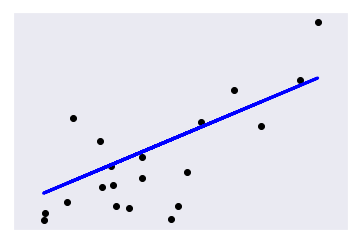

In [6]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

La régression linéaire, peut plus simplement se faire avec seaborn, qui propose des graphiques avec régression intégré. Une méthode un peu plus simple pour une simple régression linéaire.

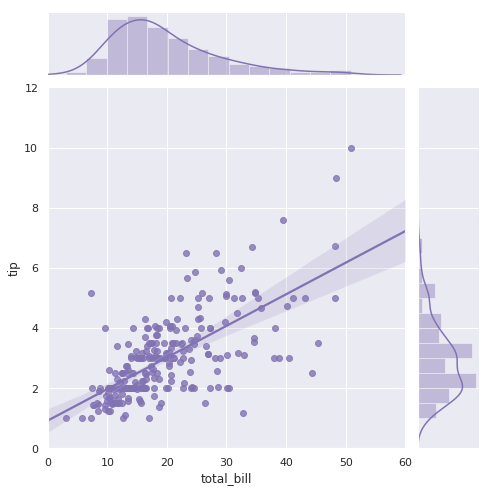

In [7]:
import seaborn as sns
sns.set(style="darkgrid")
tips = sns.load_dataset("tips")
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="m", height=7)

#### Model de régression linéaire
![](Images/modelReg.png)



## Récupération de la donnée du temps d'attente  

[lien vers la partie principale](#Récupération-de-la-donnée)

```python
import http.client
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np 
from time import gmtime, strftime
import time

conn = http.client.HTTPSConnection("open-data.opt.nc")
conn.request("GET", "https://open-data.opt.nc/agences/_search?size=1000&q=pointAdresse:(Noum%C3%A9a)%20OR%20localiteRefloc:(Noum%C3%A9a)%20OR%20designation:(Noum%C3%A9a)")
res = conn.getresponse()
data = res.read()
resultat = data.decode("utf-8")
jsonN = json.loads(resultat)
df = pd.DataFrame()
normalize ={}


normalize = {"nom":[jsonN['hits']['hits'][0]['_source']['designation']],
                     "type":[jsonN['hits']['hits'][0]['_source']['type']],
                     "id":[jsonN['hits']['hits'][0]['_id']],
                     "adresse":[jsonN['hits']['hits'][0]['_source']['pointAdresse']],
                     "AVGWaintingTime":[jsonN['hits']['hits'][0]['_source']['borneEsirius']['realAvgWaitingTime']],
                     "MAXWaintingTime":[jsonN['hits']['hits'][0]['_source']['borneEsirius']['realMaxWaitingTime']],
                     #"UPD":[jsonN['hits']['hits'][0]['_source']['updatedEsiriusDate']]
            }
for i in range (1,jsonN['hits']['total']-1):
    normalize['nom'].append(jsonN['hits']['hits'][i]['_source']['designation'])
    normalize['type'].append(jsonN['hits']['hits'][i]['_source']['type'])
    normalize['id'].append(jsonN['hits']['hits'][i]['_id'])
    normalize['adresse'].append(jsonN['hits']['hits'][i]['_source']['pointAdresse'])
    try:
        normalize['AVGWaintingTime'].append(jsonN['hits']['hits'][i]['_source']['borneEsirius']['realAvgWaitingTime'])
        normalize['MAXWaintingTime'].append(jsonN['hits']['hits'][i]['_source']['borneEsirius']['realMaxWaitingTime'])
        #normalize['UPD'].append(jsonN['hits']['hits'][i]['_source']['updatedEsiriusDate'])
    except:
        print("An exception occurred, no borneEsurius for the ",i," station") 
        normalize['AVGWaintingTime'].append('')
        normalize['MAXWaintingTime'].append('')
        #normalize['UPD'].append('null')
            
df = pd.DataFrame(normalize)
df['date'] = strftime("%Y-%m-%d %H:%M:%S", time.localtime())



try:
    data = pd.read_csv('OPTWaitingTime.csv')
    print('OPTWaitingTime.csv is here !')
    #data[data==""] <- NA
    res = False      
    for i in range (df['date'].size-1,0,-1):
        if data['date'].iloc[i] == strftime("%Y-%m-%d %H:%M:%S", time.localtime()):
            print("Point break")
            res = True
            break
    if not res:
        df = data.append(df)
except ValueError:
    print("no file OPTWaintingTime.csv")
        
df.to_excel(r'OPTWaitingTime.xlsx', index=False)
df.to_csv(r'OPTWaitingTime.csv', index=False)
```

## Heatmap OPT

[lien partie principale](#Représentations-graphiques)

![](Images/heatmapOPT1.png)
![](Images/heatmapOPT2.png)


Bien entendu toutes ces moyennes sont plutôt bien représentative, mais tout de même à prendre à la légère et observer la médiane ainsi que l'écart type.
Grâce à ce schéma, on observe très clairement quelles sont les agences les plus visitées et sur quels créneaux horaires.
Cela nous permet de voir aussi quelles agences sont ouvertes au publique et celles qui ne le sont pas.
A contrario, la médiane nous montre aussi qu'à certaines horaires, il peut y avoir beaucoup d'attente, comme aucune attente : par exemple MAGENTA A 15H. Mais la médiane nous montre aussi que nos données ne sont pas faussé par de faux résultats.


![](Images/heatmapOPTMedian.png)

Ce schéma suivant nous permet d'observer le temps d'attente moyen en seconde suivant les agences et le jour de la semaine. On y voit un temps d'attente plus long le lundi et mardi pour l'agence de magenta par exemple.


![](Images/heatmapOPT3.png)
![](Images/heatmapOPT4.png)

## QR Code Site Web

[lien partie principale](#Création-d'une-interface-Web)
  
![](Images/qr-code.png)

## ScreenShots Application Mobile
  

[lien partie principale](#Création-d'une-application-Mobile)

![](Images/app/Screenshot_2019-12-12-07-58-12-084_com.example.apirequest.jpg)  
  

![](Images/app/Screenshot_2019-12-12-07-58-20-908_com.example.apirequest.jpg)
  

![](Images/app/Screenshot_2019-12-12-07-58-39-371_com.example.apirequest.jpg)
  

![](Images/app/Screenshot_2019-12-12-07-58-59-142_com.example.apirequest.jpg)
  


#### Télécharger l'app

  
![](Images/app/qr-code(30).png)